In [1]:
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib

from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             f1_score)  # Import function to calculate various metric



from sklearn.datasets import make_moons

from tqdm import tqdm

In [2]:
###------------------
### Global Parameters
###------------------

# Directories
#inpDir = '../../input' 
# inpDir = Path('..') / '..' / 'input'
# # outDir = '../output'
# outDir = Path('..') / 'output'


RANDOM_STATE = 42
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

TEST_SIZE  = 0.2 # Size of test data

NOISE = 0.2
N_SAMPLE = 1000
EPOCHS = 20001
ALPHA = 0.01


# Parameters for plotting
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')


# numpy random set
rng = np.random.default_rng(seed=RANDOM_STATE)

In [3]:
X, y = make_moons(n_samples=N_SAMPLE, shuffle=True, noise=NOISE, random_state=RANDOM_STATE)

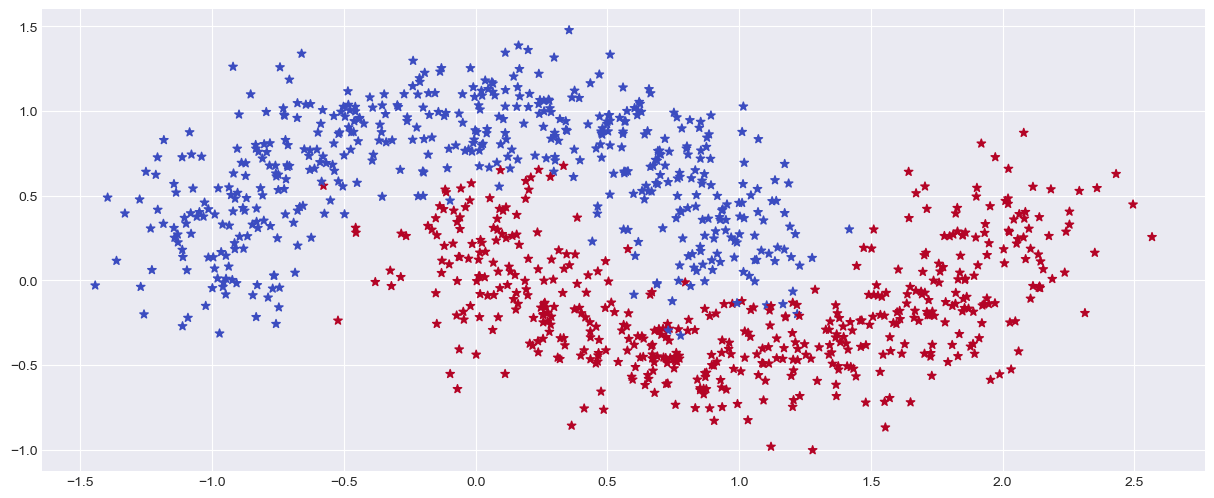

In [4]:
plt.scatter(X[:, 0], X[:, 1], s=40, c=y, marker='*', cmap=CMAP)

In [5]:
data_df = pd.DataFrame(X, columns=['A', 'B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0


In [6]:
y = pd.get_dummies(y).to_numpy()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800, 2), (200, 2))

In [8]:
def fn_softmax(z: np.ndarray) -> float:
     exp_score = np.exp(z - np.max(z))   # subtract to avoid overflow
     return exp_score / np.sum(exp_score, axis=1, keepdims=True)

In [9]:
def fn_activ(z):
    return np.tanh(z)

def fn_activ_prime(z):
    return 1.0 - np.tanh(z)**2

In [10]:
fn_activ(np.asarray([[-1,0,1],[-np.inf, 0, np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [11]:
sm = fn_softmax(np.asarray([[-1, 0, 1],[-10, 0, -8]] ))
sm

array([[9.00305732e-02, 2.44728471e-01, 6.65240956e-01],
       [4.53826452e-05, 9.99619282e-01, 3.35334911e-04]])

reshape y train as its 800 values are in a list

In [12]:
# y_train = y_train.reshape(-1,1)
y_train.shape

(800, 2)

In [13]:
X.shape, y.shape

((1000, 2), (1000, 2))

In [14]:
def calculate_loss(model, X_l, y_l):
    W1 = model['W1']
    W2 = model['W2']
    W3 = model['W3']
    W4 = model['W4']
    W5 = model['W5']
    b1 = model['b1']
    b2 = model['b2']
    b3 = model['b3']
    b4 = model['b4']
    b5 = model['b5']

    m = X_l.shape[0]

   # first layer  ---  input enters here
    z1 = X_l.dot(W1) + b1 #aggregation
    a1 = fn_activ(z1) #activation

    # second layer
    z2 = a1.dot(W2) + b2 #aggregation
    a2 = fn_activ(z2) #activation

    # third layer
    z3 = a2.dot(W3) + b3 #aggregation
    a3 = fn_activ(z3) #activation

    # fourth layer
    z4 = a3.dot(W4) + b4 #aggregation
    a4 = fn_activ(z4) #activation

    # fifth layer  --- output layer
    z5 = a4.dot(W5) + b5 #aggregation
    a5 = fn_softmax(z5) #activation


    data_loss = -(y_l * np.log(a5) + (1-y_l) * np.log(1-a5)).sum()
    return data_loss/m

In [15]:
def predict(model, X_p):
    W1 = model['W1']
    W2 = model['W2']
    W3 = model['W3']
    W4 = model['W4']
    W5 = model['W5']
    b1 = model['b1']
    b2 = model['b2']
    b3 = model['b3']
    b4 = model['b4']
    b5 = model['b5']

    # first layer  ---  input enters here
    z1 = X_p.dot(W1) + b1 #aggregation
    a1 = fn_activ(z1) #activation

    # second layer
    z2 = a1.dot(W2) + b2 #aggregation
    a2 = fn_activ(z2) #activation

    # third layer
    z3 = a2.dot(W3) + b3 #aggregation
    a3 = fn_activ(z3) #activation

    # fourth layer
    z4 = a3.dot(W4) + b4 #aggregation
    a4 = fn_activ(z4) #activation

    # fifth layer  --- output layer
    z5 = a4.dot(W5) + b5 #aggregation
    a5 = fn_softmax(z5) #activation


    return a5.argmax(axis=1)


In [ ]:
loss_hist = {}

param = {}
param['h_dim'] = [X_train.shape[1], 5, 5, 4, 3, y_train.shape[1]]


In [17]:
param

{'h_dim': [2, 5, 5, 4, 3, 2]}

In [ ]:

def build_model(param, train_x, train_y, test_x, test_y, alpha, n_epoch):
    m = train_x.shape[0] # number of rows
    nn_output_dim = y.shape[1]
    W1 = rng.random((param['h_dim'][0], param['h_dim'][1])) / np.sqrt(param['h_dim'][0])
    W2 = rng.random((param['h_dim'][1], param['h_dim'][2])) / np.sqrt(param['h_dim'][1])
    W3 = rng.random((param['h_dim'][2], param['h_dim'][3])) / np.sqrt(param['h_dim'][2])
    W4 = rng.random((param['h_dim'][3], param['h_dim'][4])) / np.sqrt(param['h_dim'][3])
    W5 = rng.random((param['h_dim'][4], param['h_dim'][5])) / np.sqrt(param['h_dim'][4])

    b1 = np.zeros((1,param['h_dim'][1]))
    b2 = np.zeros((1,param['h_dim'][2]))
    b3 = np.zeros((1,param['h_dim'][3]))
    b4 = np.zeros((1,param['h_dim'][4]))
    b5 = np.zeros((1,param['h_dim'][5]))

    loss, epoch, test_loss = [], [], []

    for i in range(n_epoch):
# -----------> FORWARD PROPAGATION< -----------
        # first layer  ---  input enters here
        z1 = train_x.dot(W1) + b1 #aggregation
        a1 = fn_activ(z1) #activation

        # second layer
        z2 = a1.dot(W2) + b2 #aggregation
        a2 = fn_activ(z2) #activation

        # third layer
        z3 = a2.dot(W3) + b3 #aggregation
        a3 = fn_activ(z3) #activation

        # fourth layer
        z4 = a3.dot(W4) + b4 #aggregation
        a4 = fn_activ(z4) #activation

        # fifth layer  --- output layer
        z5 = a4.dot(W5) + b5 #aggregation
        a5 = fn_softmax(z5) #activation


 # -----------> BACKWARD PROPAGATION of loss< -----------
        # Layer 5
        dz5 = a5 - train_y #m,1
        assert(z5.shape == dz5.shape), f'Shape z5: {z5.shape},{dz5.shape}'        

        dW5 = a4.T.dot(dz5)
        assert(W5.shape == dW5.shape), f'Shape W5: {W5.shape},{dW5.shape}'

        db5 = np.sum(dz5, axis=0, keepdims=True)
        assert(b5.shape == db5.shape), f'Shape b5: {b5.shape},{db5.shape}'
        
        da4 = dz5.dot(W5.T)
        assert(a4.shape == da4.shape),  f'Shape a4: {a4.shape},{da4.shape}'

        # LAYER 4
        dz4 = da4 * fn_activ_prime(z4)
        assert(z4.shape == dz4.shape), f'Shape z4: {z4.shape},{dz4.shape}'        

        dW4 = a3.T.dot(dz4)
        assert(W4.shape == dW4.shape), f'Shape W4: {W4.shape},{dW4.shape}'

        db4 = np.sum(dz4, axis=0, keepdims=True)
        assert(b4.shape == db4.shape), f'Shape b4: {b4.shape},{db4.shape}'
        
        da3 = dz4.dot(W4.T)
        assert(a3.shape == da3.shape),  f'Shape a3: {a3.shape},{da3.shape}'

        # LAYER 3
        dz3 = da3 * fn_activ_prime(z3)
        assert(z3.shape == dz3.shape), f'Shape z3: {z3.shape},{dz3.shape}'        

        dW3 = a2.T.dot(dz3)
        assert(W3.shape == dW3.shape), f'Shape W3: {W3.shape},{dW3.shape}'

        db3 = np.sum(dz3, axis=0, keepdims=True)
        assert(b3.shape == db3.shape), f'Shape b3: {b3.shape},{db3.shape}'
        
        da2 = dz3.dot(W3.T)
        assert(a2.shape == da2.shape),  f'Shape a2: {a2.shape},{da2.shape}'

        # LAYER 2
        dz2 = da2 * fn_activ_prime(z2)
        assert(z2.shape == dz2.shape), f'Shape z2: {z2.shape},{dz2.shape}'        

        dW2 = a1.T.dot(dz2)
        assert(W2.shape == dW2.shape), f'Shape W2: {W2.shape},{dW2.shape}'

        db2 = np.sum(dz2, axis=0, keepdims=True)
        assert(b2.shape == db2.shape), f'Shape b2: {b2.shape},{db2.shape}'
        
        da1 = dz2.dot(W2.T)
        assert(a1.shape == da1.shape),  f'Shape a1: {a1.shape},{da1.shape}'

        # LAYER 1
        dz1 = da1 * fn_activ_prime(z1)
        assert(z1.shape == dz1.shape),  f'Shape b2: {z1.shape},{dz1.shape}'

        dW1 = (train_x.T).dot(dz1)
        assert(W1.shape == dW1.shape), f'Shape b2: {W1.shape},{dW1.shape}'

        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert(b1.shape == db1.shape), f'Shape b2: {b1.shape},{db1.shape}'



        W1 = W1 - alpha * dW1 / m
        b1 = b1 - alpha * db1 / m
        W2 = W2 - alpha * dW2 / m
        b2 = b2 - alpha * db2 / m
        W3 = W3 - alpha * dW3 / m
        b3 = b3 - alpha * db3 / m
        W4 = W4 - alpha * dW4 / m
        b4 = b4 - alpha * db4 / m
        W5 = W5 - alpha * dW5 / m
        b5 = b5 - alpha * db5 / m

    
        model = {'W1':W1, 'W2':W2, 'W3':W3,  'W4':W4, 'W5':W5, 
                'b1':b1,  'b2':b2, 'b3':b3, 'b4':b4, 'b5':b5}

        current_loss = calculate_loss(model, train_x, train_y)
        current_test_loss = calculate_loss(model, test_x, test_y)

        epoch.append(i)
        loss.append(current_loss)
        test_loss.append(current_test_loss)
        if i%1000 == 0:
            print(f'epoch - {i}: Loss - {current_loss:.5f}, Test Loss - {current_test_loss:.5f}')

        
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    loss_hist['test_loss'] = test_loss


    return model


With scaling

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [20]:
model = build_model(param, X_train_scl, y_train, X_test_scl,
                    y_test, alpha=ALPHA, n_epoch=EPOCHS)
# model

epoch - 0: Loss - 1.39364, Test Loss - 1.39609
epoch - 1000: Loss - 0.68010, Test Loss - 0.67865
epoch - 2000: Loss - 0.63545, Test Loss - 0.64498
epoch - 3000: Loss - 0.61830, Test Loss - 0.62370
epoch - 4000: Loss - 0.60671, Test Loss - 0.60932
epoch - 5000: Loss - 0.59509, Test Loss - 0.59440
epoch - 6000: Loss - 0.55963, Test Loss - 0.54959
epoch - 7000: Loss - 0.33658, Test Loss - 0.29828
epoch - 8000: Loss - 0.19002, Test Loss - 0.14153
epoch - 9000: Loss - 0.16654, Test Loss - 0.10786
epoch - 10000: Loss - 0.16089, Test Loss - 0.09694
epoch - 11000: Loss - 0.15913, Test Loss - 0.09280
epoch - 12000: Loss - 0.15832, Test Loss - 0.09103
epoch - 13000: Loss - 0.15779, Test Loss - 0.09020
epoch - 14000: Loss - 0.15738, Test Loss - 0.08979
epoch - 15000: Loss - 0.15703, Test Loss - 0.08958
epoch - 16000: Loss - 0.15671, Test Loss - 0.08948
epoch - 17000: Loss - 0.15642, Test Loss - 0.08945
epoch - 18000: Loss - 0.15615, Test Loss - 0.08946
epoch - 19000: Loss - 0.15589, Test Loss - 0

In [21]:
model['W1'].shape, model['W2'].shape, model['b1'].shape, model['b2'].shape

((2, 5), (5, 5), (1, 5), (1, 5))

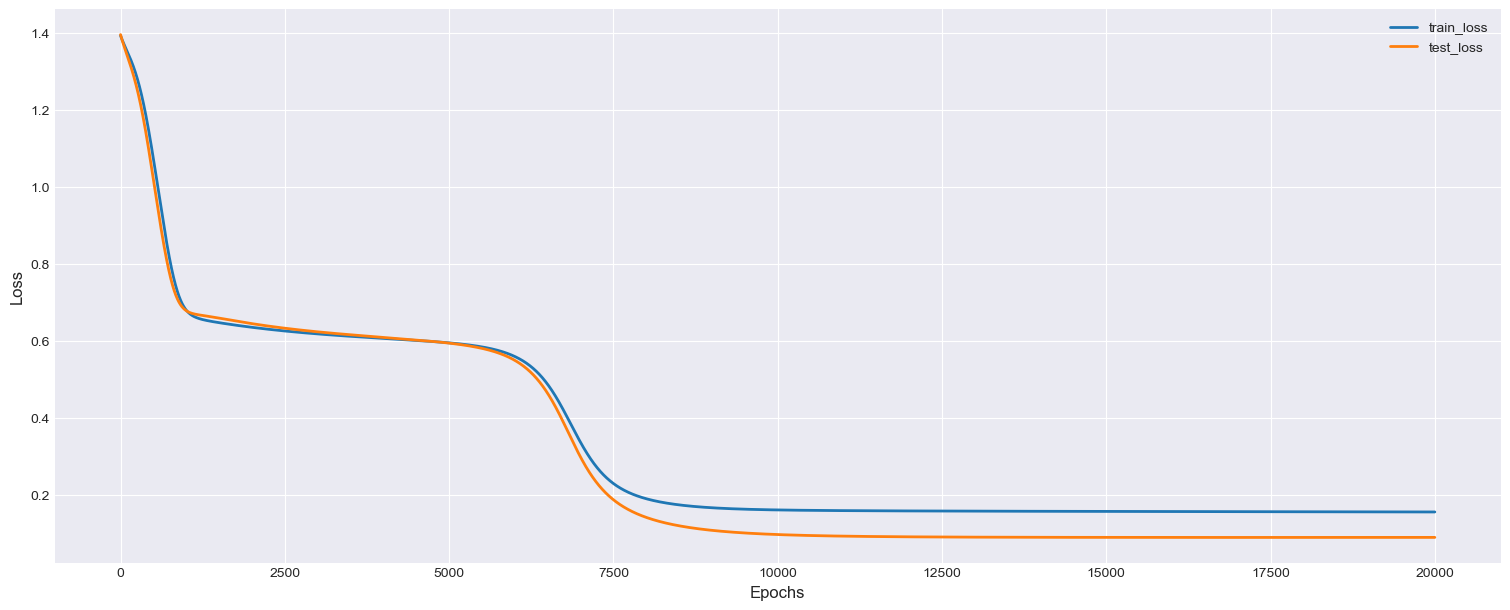

In [22]:
loss_df = pd.DataFrame(loss_hist)
fig, ax = plt.subplots()

ax.plot(loss_df['loss'], label='train_loss', lw=2)
ax.plot(loss_df['test_loss'], label='test_loss', lw=2)
ax.legend()
plt.tight_layout()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [23]:
def fn_plot_decision_boundary(X: np.ndarray, y: np.ndarray, model:dict, predict):
    
    # Initialize the figure with specified dimensions
    fig, ax = plt.subplots( figsize=(8, 5) )
    
    # Small increment value to create a fine grid for smooth decision boundary
    dm = 0.01
    padding = 2 * dm
    
    # Calculate the range for x-axis (first feature) with padding
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    
    # Calculate the range for y-axis (second feature) with padding  
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    
    # Create a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # Flatten the mesh grid arrays and stack them column-wise to create coordinate pairs
    XX = np.c_[xx.ravel(), yy.ravel()] # Resulting shape: (n_points, 2)

    # List to collect predictions for each point in the mesh grid
    y_pred = predict(model,XX)
        
    # Reshape predictions to match the original mesh grid dimensions
    Z = np.array(y_pred).reshape(xx.shape)

    # Create filled contour plot showing the decision regions
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    
    # Scatter plot of the actual data points, colored by their true class labels
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.bwr)
    
    # Set plot title and axis labels
    ax.set_title('Decision Boundary')
    ax.set_xlabel('A')  
    ax.set_ylabel('B') 
    
    # Display the final plot
    plt.show()

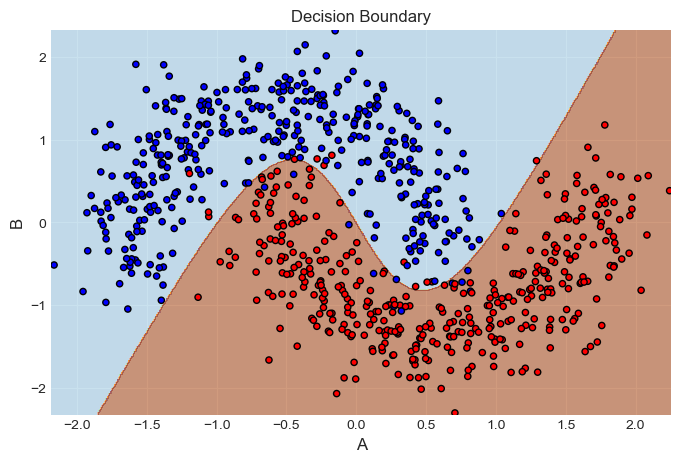

In [26]:
fn_plot_decision_boundary(X_train_scl, y_train.argmax(axis=1), model, predict)

REPLACE OLD VARIABLES WITH THE SAME NAME TO MAXIMIZE RESOURCE USAGE, BECAUSE DATA WILL BE HUGE SO YOU NEED MEMORY TO STORE DATA RATHER THAN STORING INTERMEDIATE VARIABLES WHICH ARE UNNECESSARY (like X_train, X_train_scl)

Evaluating on train set

In [27]:
y_pred = predict(model, X_train_scl)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,\
                            confusion_matrix, ConfusionMatrixDisplay, f1_score

print(classification_report(y_train.argmax(axis=1), y_pred))
f1 = f1_score(y_train.argmax(axis=1), y_pred, average='weighted')


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       400
           1       0.97      0.97      0.97       400

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



Text(0.5, 1.0, 'F1 Score : 0.9712499550780548')

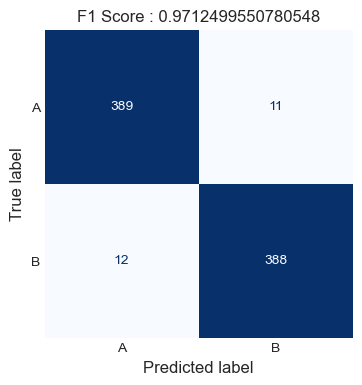

In [ ]:
cm = confusion_matrix(y_train.argmax(axis=1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'B'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
ax.grid(False)
ax.set_title(f'F1 Score : {f1:.5f}')

Evaluating on test set

In [ ]:
y_pred = predict(model, X_test_scl)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,\
                            confusion_matrix, ConfusionMatrixDisplay, f1_score

print(classification_report(y_train.argmax(axis=1), y_pred))
f1 = f1_score(y_train.argmax(axis=1), y_pred, average='weighted')


Text(0.5, 1.0, 'F1 Score : 0.9712499550780548')

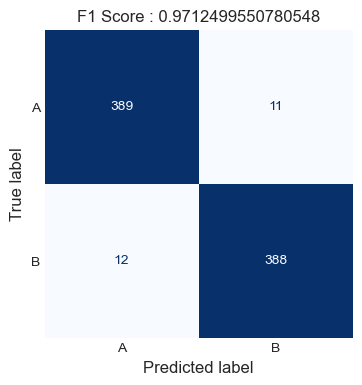

In [ ]:
cm = confusion_matrix(y_train.argmax(axis=1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'B'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
ax.grid(False)
ax.set_title(f'F1 Score : {f1:.5f}')
plt.tight_layout()
plt.show()

## Overfitting

More neurons, more epochs

In [45]:
param = {}
param['h_dim'] = [X_train.shape[1], 100, 50, 40, 30, y_train.shape[1]]

In [47]:
model = build_model(param, X_train_scl, y_train, X_test_scl,
                    y_test, alpha=ALPHA, n_epoch=200000)

epoch - 0: Loss - 1.32126, Test Loss - 1.28152
epoch - 1000: Loss - 1.27940, Test Loss - 1.19229
epoch - 2000: Loss - 1.25579, Test Loss - 1.16168
epoch - 3000: Loss - 1.17576, Test Loss - 1.09478
epoch - 4000: Loss - 1.10518, Test Loss - 1.00077
epoch - 5000: Loss - 1.01643, Test Loss - 0.94001
epoch - 6000: Loss - 0.92331, Test Loss - 0.88660
epoch - 7000: Loss - 0.76972, Test Loss - 0.77842
epoch - 8000: Loss - 0.73979, Test Loss - 0.76063
epoch - 9000: Loss - 0.72988, Test Loss - 0.75359
epoch - 10000: Loss - 0.71760, Test Loss - 0.74552
epoch - 11000: Loss - 0.70101, Test Loss - 0.73532
epoch - 12000: Loss - 0.67771, Test Loss - 0.71332
epoch - 13000: Loss - 0.64706, Test Loss - 0.67078
epoch - 14000: Loss - 0.61165, Test Loss - 0.61568
epoch - 15000: Loss - 0.53289, Test Loss - 0.50945
epoch - 16000: Loss - 0.29275, Test Loss - 0.22994
epoch - 17000: Loss - 0.16576, Test Loss - 0.10651
epoch - 18000: Loss - 0.14571, Test Loss - 0.09168
epoch - 19000: Loss - 0.13856, Test Loss - 0

In [48]:
y_pred = predict(model, X_train_scl)

In [49]:
from sklearn.metrics import accuracy_score, classification_report,\
                            confusion_matrix, ConfusionMatrixDisplay, f1_score

print(classification_report(y_train.argmax(axis=1), y_pred))
f1 = f1_score(y_train.argmax(axis=1), y_pred, average='weighted')


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       400
           1       0.98      0.99      0.98       400

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



Text(0.5, 1.0, 'F1 Score : 0.98375')

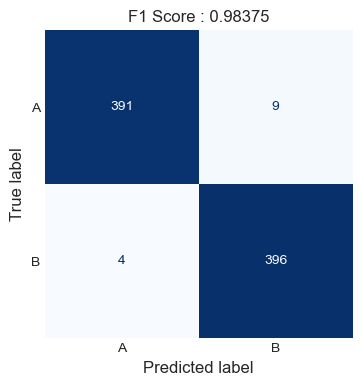

In [50]:
cm = confusion_matrix(y_train.argmax(axis=1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'B'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
ax.grid(False)
ax.set_title(f'F1 Score : {f1:.5f}')

Evaluating on test set

In [51]:
y_pred = predict(model, X_test_scl)

In [52]:
from sklearn.metrics import accuracy_score, classification_report,\
                            confusion_matrix, ConfusionMatrixDisplay, f1_score

print(classification_report(y_test.argmax(axis=1), y_pred))
f1 = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.98      0.98      0.98       100

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



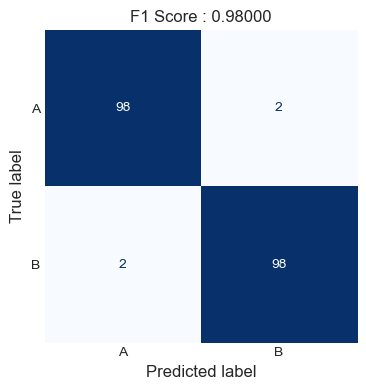

In [53]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'B'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
ax.grid(False)
ax.set_title(f'F1 Score : {f1:.5f}')
plt.tight_layout()
plt.show()